# TD 4

## Transformée de Fourrier

* Soyez certain d'avoir installé les packages nympy, matplotlib, scipy et skimage (pour la derniere question optionnelle)
* Créer un Jupyter notebook pour le TD d'aujourd'hui
* Téléchargez les fichiers SingingGlass.wav et Rotating_Superfluid.tif de la page Github du cour




In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.fft import fft, ifft, rfft, irfft, rfftfreq, fftfreq

### 1 exemple de DFT

In [35]:
def f(sigma,L,N):
    Delta_x = L/N
    x = Delta_x*np.arange(N)-L/2
    y = np.exp(-x**2/(2*sigma**2))
    return x, y

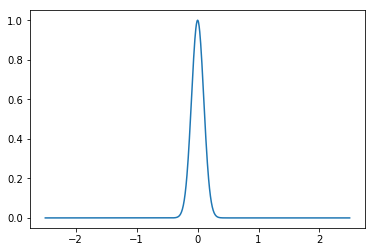

In [36]:
L=5
N=1000
sigma=0.1
x, y = f(sigma, L, N)
plt.plot(x, y)

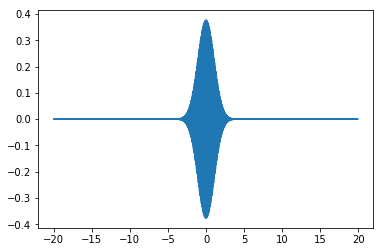

In [55]:
L = 1/0.04
N=int(2*20*L) # f_max = dx/2
sigma=0.15
x, y = f(sigma,L,N)

f_tilde = fft(y)
f_axis = fftfreq(N, L/N)
plt.plot(f_axis, f_tilde*L/N)

# La TF présente des valeurs négatives car elle n'est pas centrée en j=0 mais en j=N/2
# La phase vaut exp(2ipi N/2 k/N) donc \pm 1

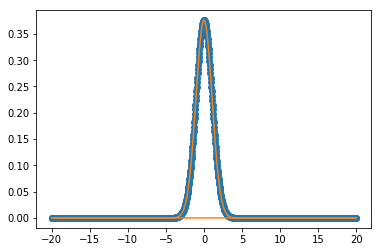

In [56]:
f_tilde = fft(y)
f_axis = fftfreq(N, L/N)
plt.plot(f_axis, np.abs(f_tilde)*L/N, 'o')

plt.plot(f_axis, np.sqrt(2*np.pi)*sigma*np.exp(-(2*np.pi*f_axis)**2*sigma**2/2))
#plt.xlim(-50, 50)

/dd_int/anaconda3.7/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


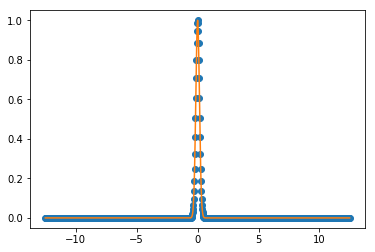

In [57]:
signal_initial = ifft(f_tilde)
plt.plot(x, signal_initial, 'o')
plt.plot(x, y)

### 2 Les verres chantants

N = 800001
dt =  2.2675736961451248e-05 s
T = 18.14061224489796 s


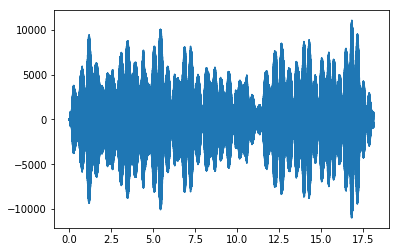

In [60]:
from scipy.io.wavfile import read
Fs , amplitude = read('SingingGlass.wav')
N = len(amplitude)
print('N =',N)
dt = 1/Fs
print('dt = ', dt,'s')
T = dt*N
print('T =',T,'s')
time = np.arange(N)*dt
plt.plot(time,amplitude)

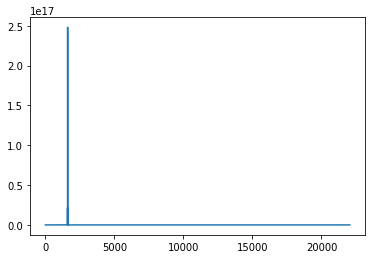

In [61]:
frequency = rfft(amplitude)
freqs = rfftfreq(N, dt)
plt.plot(freqs, np.abs(frequency)**2, '')

(1600, 1620)

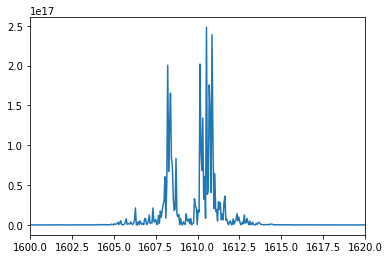

In [62]:
plt.plot(freqs, np.abs(frequency)**2, '')
plt.xlim(1600, 1620)

## 4 - Application 2D : récupérer la phase d'une fonction d'onde

In [66]:
from numpy.fft import fft2, ifft2

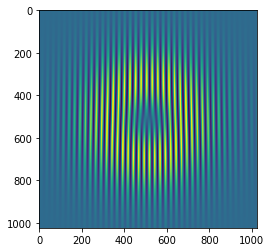

In [67]:
def Laguerre_Gauss(x, y, l, w):
    r = np.sqrt(x**2+y**2)
    phi = np.arctan2(y,x)
    Laguerre = np.exp(1J*phi*l)*np.exp(-r**2/w**2)*(r*np.sqrt(2)/w)**abs(l)
    return Laguerre

def plane_wave(x,y,kx,ky):     
    return 1.0*np.exp(1J*(kx*x + ky*y)) 

w0 = 1
L=4*w0
N=1024
x0 = np.arange(N)*L/N - L/2
x,y = np.meshgrid(x0,x0)

kx = 2*np.pi/(0.1)
ky = 0

l = 1

signal = Laguerre_Gauss(x, y, l, w0)
reference = plane_wave(x,y,kx,ky)

interf = np.abs(signal+reference)**2
plt.imshow(interf)

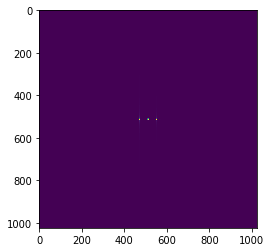

In [87]:
interf_tilde = np.fft.fftshift(fft2(interf))
plt.imshow(np.abs(interf_tilde), vmin=0, vmax=1E4)
plt.show()

In [89]:
plt.rcParams["figure.figsize"] = (15,9)

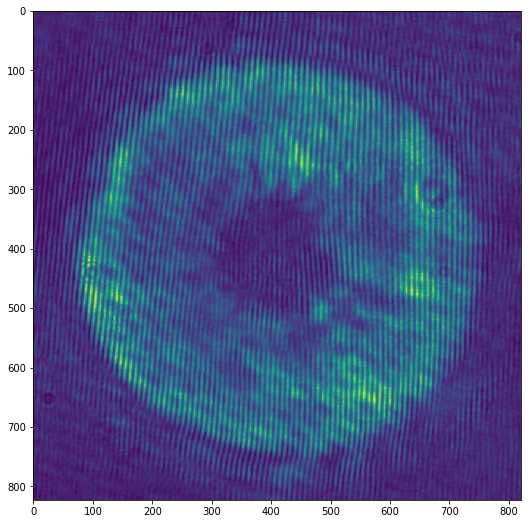

In [90]:
import matplotlib.image
image = matplotlib.image.imread("Rotating_Superfluid.tif")
plt.imshow(image)
plt.show()

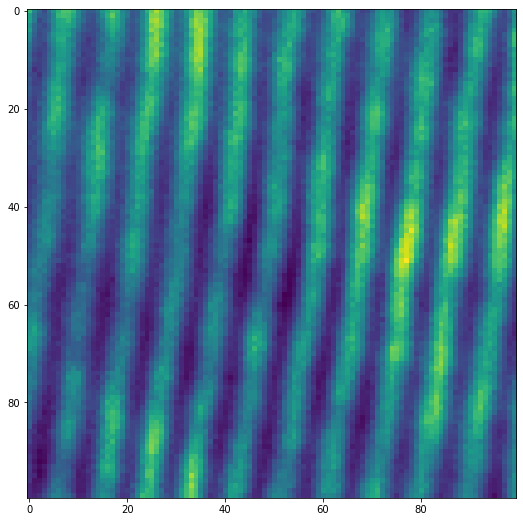

In [180]:
plt.imshow(image[200:300,200:300])
plt.show()

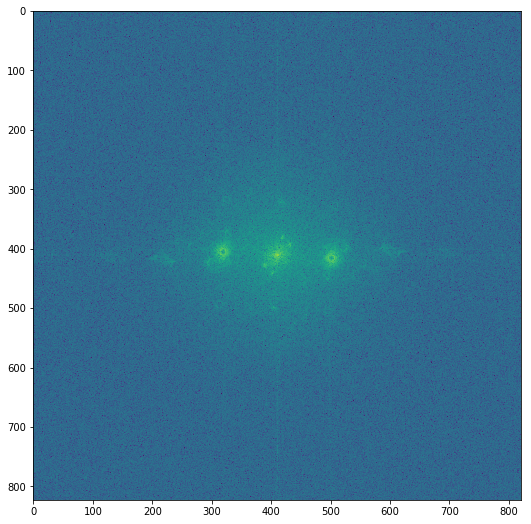

In [91]:
image_tilde = np.fft.fftshift(fft2(image))
plt.imshow(np.log(np.abs(image_tilde)))

In [99]:
Lx, Ly = image_tilde.shape

center_x, center_y = (415,500)
dx = dy = 40
signal = image_tilde[center_x-dx : center_x+dx,
                     center_y-dy : center_y+dy]

reconstructed_signal_tilde = np.zeros((Lx, Ly), dtype='complex128')

reconstructed_signal_tilde[Lx//2-dx : Lx//2+dx , Ly//2-dy : Ly//2+dy] = signal

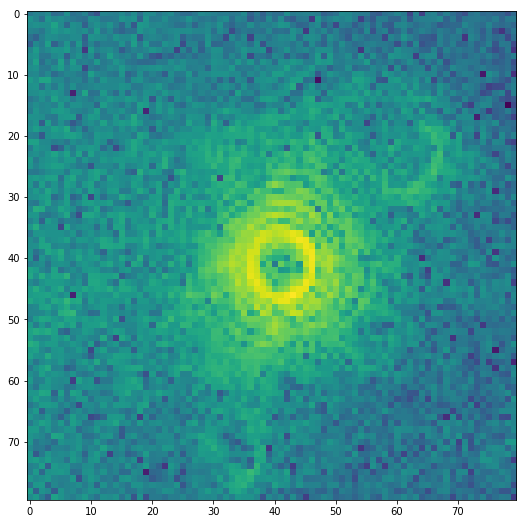

In [100]:
plt.imshow(np.log(np.abs(signal)))
plt.show()

In [101]:
reconstructed_signal = ifft2(np.fft.ifftshift(reconstructed_signal_tilde))
amplitude = np.abs(reconstructed_signal)
phase = np.angle(reconstructed_signal)

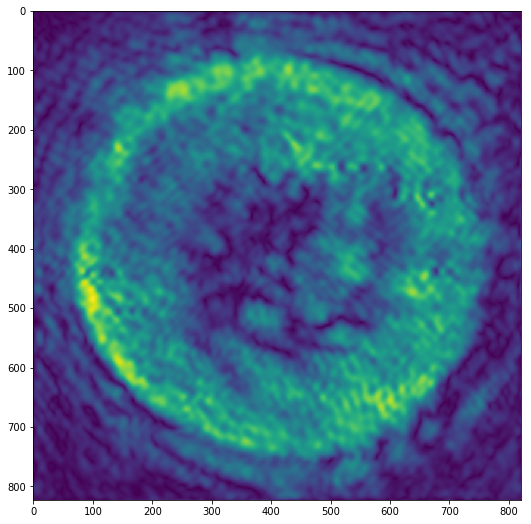

In [102]:
plt.imshow(amplitude)
plt.show()

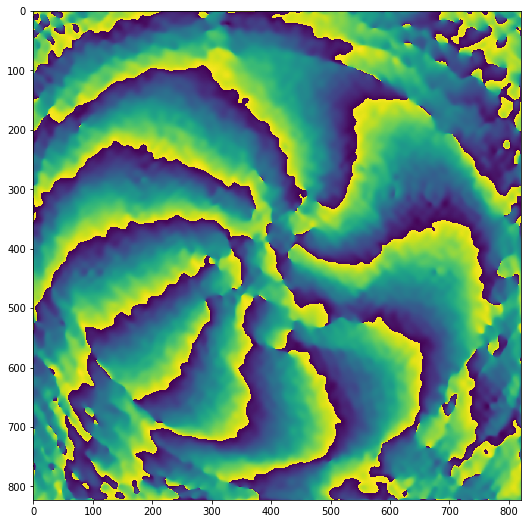

In [105]:
plt.imshow(phase)
plt.show()

### Optionnel, requiert le package skimage

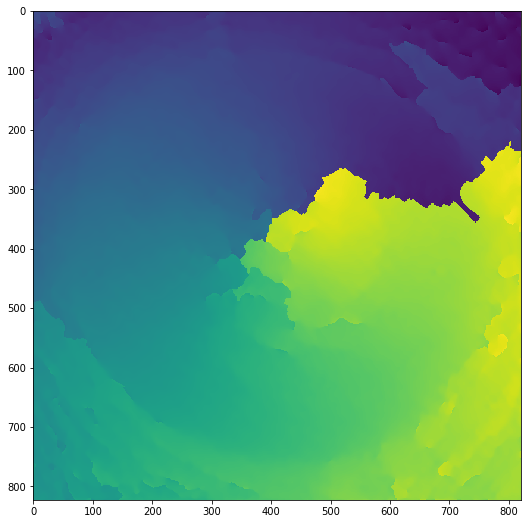

In [106]:
from skimage.restoration import unwrap_phase
phase_unwrapped = unwrap_phase(phase)
plt.imshow(phase_unwrapped)
plt.show()

In [107]:
phase_winding = np.amax(phase_unwrapped)
winding_number = round(phase_winding/(2*np.pi))
print(f"This vortex has a topological charge of {winding_number}")

This vortex has a topological charge of 10.0
